In [183]:
import sklearn, torch
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split


In [184]:
n_samples = 1000
X, y = make_circles(n_samples, random_state=42, noise=0.03)

X, y.shape

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 (1000,))

In [185]:
# device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [186]:
# split the dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 2) (200, 2) (800,) (200,)


In [187]:
# turning the datasets to tensors

X_train = torch.from_numpy(X_train).type(torch.float32)
X_test = torch.from_numpy(X_test).type(torch.float32)
y_train = torch.from_numpy(y_train).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.float32)

type(X_train)

torch.Tensor

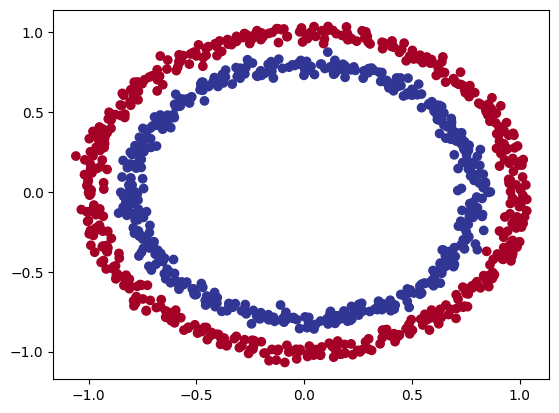

In [188]:
# visualize the datasets
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu)


In [189]:
# building the neural network
class clf(torch.nn.Module):
    def __init__(self, hidden_nodes):
        super().__init__()
        self.Layer1 = torch.nn.Linear(in_features=2, out_features=hidden_nodes, dtype=torch.float32)
        self.Layer2 = torch.nn.Linear(in_features=hidden_nodes, out_features=hidden_nodes, dtype=torch.float32)
        self.ReLu = torch.nn.ReLU()
        self.Layer3 = torch.nn.Linear(in_features=hidden_nodes, out_features=1, dtype=torch.float32)
        

    def forward(self, x):
        return self.Layer3(self.ReLu(self.Layer2(self.ReLu(self.Layer1(x)))))

model  = clf(5)
model(X_train[:5])        

tensor([[-0.1424],
        [-0.1484],
        [-0.1239],
        [-0.1142],
        [-0.1753]], grad_fn=<AddmmBackward0>)

In [190]:
# defining the losses and the optimizer
loss = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [191]:
# creating a function that calculates the accuracy metric
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    accuracy = (correct/len(y_pred)) * 100
    return accuracy


In [192]:
# training the model

epochs = 5000
for epoch in range(epochs):
    # training the model
    model.train()
    train_logits = model(X_train).squeeze()  #this removes the 1 from the outer dimension
    train_pred = torch.round(torch.sigmoid(train_logits))

    # calculating loss, Binary Cross Entropy
    train_loss = loss(train_logits, y_train)
    train_accuracy = accuracy_fn(y_train, train_pred)

    # setting the gradients from previous epochs to zero
    optimizer.zero_grad()
    
    # calculating gradients 
    train_loss.backward()

    # applying the gradient descent step
    optimizer.step()

    # checking on accuracy on test dataset
    model.eval()

    with torch.inference_mode():
         test_logits = model(X_test).squeeze()
         test_pred = torch.round(torch.sigmoid(test_logits))
     

         test_loss = loss(test_logits, y_test)
         test_accuracy = accuracy_fn(y_test, test_pred)


    #print the progress after avery 10 epochs:
    if epoch % 10 == 0: 
          print(f"epoch:{epoch} loss:{train_loss} accuracy:{train_accuracy} | test_loss:{test_loss} test_accuracy:{test_accuracy}")

    


epoch:0 loss:0.695148229598999 accuracy:50.0 | test_loss:0.694669783115387 test_accuracy:50.0
epoch:10 loss:0.6938543915748596 accuracy:50.0 | test_loss:0.6934550404548645 test_accuracy:50.0
epoch:20 loss:0.6931621432304382 accuracy:50.0 | test_loss:0.6928041577339172 test_accuracy:50.0
epoch:30 loss:0.6927005052566528 accuracy:50.0 | test_loss:0.6924328804016113 test_accuracy:50.0
epoch:40 loss:0.69242262840271 accuracy:49.75 | test_loss:0.6922065615653992 test_accuracy:50.5
epoch:50 loss:0.6922817826271057 accuracy:50.625 | test_loss:0.6920903921127319 test_accuracy:52.5
epoch:60 loss:0.6921983361244202 accuracy:50.125 | test_loss:0.6920158267021179 test_accuracy:54.0
epoch:70 loss:0.6921376585960388 accuracy:49.5 | test_loss:0.6919564008712769 test_accuracy:53.0
epoch:80 loss:0.6920884847640991 accuracy:48.375 | test_loss:0.6919047832489014 test_accuracy:52.0
epoch:90 loss:0.6920410394668579 accuracy:49.125 | test_loss:0.6918576955795288 test_accuracy:54.0
epoch:100 loss:0.691996157